In [ ]:
# Computes several statistics and provides some tools for the LFM-1b dataset of Last.fm listening histories.
# Author: Markus Schedl

import numpy as np
import h5py
from scipy import sparse

UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'                  # Matlab .mat file where the listening events are stored
STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'         # output file for statistics


In [ ]:

# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
# Author: Markus Schedl
def read_UAM(m_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf.get('idx_users')).astype(np.int64)[:1000]
    artist_ids = np.array(mf.get('idx_artists')).astype(np.int64)[:500]
    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']["data"],
                             mf['/LEs/']["ir"],
                             mf['/LEs/']["jc"])).transpose()    #.tocoo().transpose()#artist user originally
    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices #UAM.row -> for COO matrix
    UAM_artist_idx = UAM.indptr #UAM.col -> for COO matrix
    return UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids

if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE)
    print ('Users: ', len(user_ids))
    print ('Artists: ', len(artist_ids))

    # Compute some basic statistics
    pc_sum = np.zeros((len(user_ids)), dtype=np.int32)
    pc_uniq_artists = np.zeros((len(user_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(user_ids)), dtype=np.float32)
    pc_median = np.zeros((len(user_ids)), dtype=np.float32)
    pc_std = np.zeros((len(user_ids)), dtype=np.float32)
    for i in range(0, len(user_ids)):
        pc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(pc_i)
        pc_uniq_artists[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print ('User ' + str(i) +    "   Playcount: " + str(pc_sum[i]) +
                                    "   Unique artists: " + str(pc_uniq_artists[i]) + \
                                    "   Mean PC/artist: " + str(pc_mean[i]) + \
                                    "   Std. PC/artist: " + str(pc_std[i]) + \
                                    "   Median PC/artist: " + str(pc_median[i]))
    # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE, np.column_stack((pc_sum, pc_uniq_artists, pc_mean, pc_std, pc_median)), fmt="%.3f")

Users:  1000
Artists:  500
User 0   Playcount: 17178   Unique artists: 323   Mean PC/artist: 53.182663   Std. PC/artist: 130.69711   Median PC/artist: 10.0
User 1   Playcount: 17927   Unique artists: 1669   Mean PC/artist: 10.741162   Std. PC/artist: 24.213726   Median PC/artist: 2.0
User 2   Playcount: 3850   Unique artists: 1137   Mean PC/artist: 3.3861039   Std. PC/artist: 6.758265   Median PC/artist: 1.0
User 3   Playcount: 234   Unique artists: 112   Mean PC/artist: 2.0892856   Std. PC/artist: 2.9476187   Median PC/artist: 1.0
User 4   Playcount: 17816   Unique artists: 1958   Mean PC/artist: 9.099081   Std. PC/artist: 20.904457   Median PC/artist: 2.0
User 5   Playcount: 800   Unique artists: 248   Mean PC/artist: 3.2258065   Std. PC/artist: 4.566425   Median PC/artist: 1.0
User 6   Playcount: 616   Unique artists: 219   Mean PC/artist: 2.8127854   Std. PC/artist: 5.671093   Median PC/artist: 1.0
User 7   Playcount: 17688   Unique artists: 2183   Mean PC/artist: 8.102612   Std. P

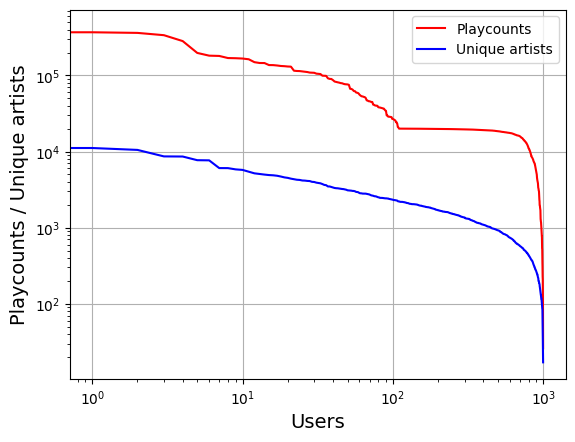

Avg_playcount =  23080.793
Sdev_playcount =  33820.497190670496
Avg_artists =  1205.325
Sdev_artists =  1215.0561383635738
Avg_MeanPC =  28.10715
Sdev_MeanPC =  48.99329212577473
Avg_MedianPC =  5.377
Sdev_MedianPC =  9.272991480638813


In [ ]:
# Creates a plot of some statistics about LFM-1b.
# Author: Markus Schedl

import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'         # output file for statistics (from LFM-1b_stats.py)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])
#    plt.title('Artist-based statistics', fontsize=18)
    plt.xlabel('Users', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

# Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)


In [ ]:

# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
# Author: AV

def read_UAM(m_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf.get('idx_users')).astype(np.int64)
    artist_ids = np.array(mf.get('idx_artists')).astype(np.int64)
    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']["data"],
                             mf['/LEs/']["ir"],
                             mf['/LEs/']["jc"]))
    # user and artist indices to access UAM
    UAM_artist_idx = UAM.indices #UAM.row -> for COO matrix
    UAM_user_idx = UAM.indptr #UAM.col -> for COO matrix
    return UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids

if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE)
    print ('Users: ', len(user_ids))
    print ('Artists: ', len(artist_ids))

    # Compute some basic statistics with respect to listeners
    lc_sum = np.zeros((len(artist_ids)), dtype=np.int32)
    lc_uniq_users = np.zeros((len(artist_ids)), dtype=np.int32)
    lc_mean = np.zeros((len(artist_ids)), dtype=np.float32)
    lc_median = np.zeros((len(artist_ids)), dtype=np.float32)
    lc_std = np.zeros((len(artist_ids)), dtype=np.float32)
    for i in range(0, len(artist_ids)):
        lc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(lc_i)
        lc_uniq_users[i] = len(idx_nz[1])
        lc_sum[i] = np.sum(lc_i[idx_nz])
        lc_mean[i] = np.mean(lc_i[idx_nz])
        lc_std[i] = np.std(lc_i[idx_nz])
        lc_median[i] = np.median(lc_i[idx_nz])
        print ('Artist ' + str(i) +    "   Listen count: " + str(lc_sum[i]) +
                                        "   listeners: " + str(lc_uniq_users[i]) + \
                                        "   Mean LC/user: " + str(lc_mean[i]) + \
                                        "   Std. LC/user: " + str(lc_std[i]) + \
                                        "   Median LC/user: " + str(lc_median[i]))
    # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE, np.column_stack((lc_sum, lc_uniq_users, lc_mean, lc_std, lc_median)), fmt="%.3f")


Streaming output truncated to the last 5000 lines.
Artist 580095   Listen count: 84   listeners: 6   Mean LC/user: 14.0   Std. LC/user: 21.291626   Median LC/user: 5.5
Artist 580096   Listen count: 6   listeners: 5   Mean LC/user: 1.2   Std. LC/user: 0.4   Median LC/user: 1.0
Artist 580097   Listen count: 10   listeners: 7   Mean LC/user: 1.4285715   Std. LC/user: 0.72843134   Median LC/user: 1.0
Artist 580098   Listen count: 1806   listeners: 246   Mean LC/user: 7.3414636   Std. LC/user: 22.659311   Median LC/user: 2.0
Artist 580099   Listen count: 5622   listeners: 156   Mean LC/user: 36.03846   Std. LC/user: 80.64022   Median LC/user: 8.0
Artist 580100   Listen count: 14   listeners: 6   Mean LC/user: 2.3333333   Std. LC/user: 1.3743685   Median LC/user: 2.0
Artist 580101   Listen count: 11   listeners: 5   Mean LC/user: 2.2   Std. LC/user: 1.9390719   Median LC/user: 1.0
Artist 580102   Listen count: 9   listeners: 6   Mean LC/user: 1.5   Std. LC/user: 0.5   Median LC/user: 1.5
Art

In [ ]:
len(artist_ids)

585095

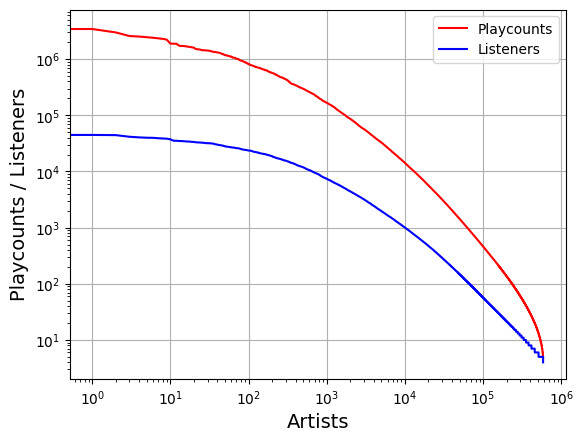

Avg_playcount =  1823.644334680693
Sdev_playcount =  24744.823317435206
Avg_artists =  105.1700151257488
Sdev_artists =  733.238477916033
Avg_MeanPC =  7.888483653081979
Sdev_MeanPC =  17.833776718955665
Avg_MedianPC =  2.494807680803972
Sdev_MedianPC =  2.9862548487035654


In [ ]:
# Creates a plot of some statistics about LFM-1b.
# Author: AV

import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'         # output file for statistics (from LFM-1b_stats.py)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Listeners'])
#    plt.title('Listener-based statistics', fontsize=18)
    plt.xlabel('Artists', fontsize=14)
    plt.ylabel('Playcounts / Listeners', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)


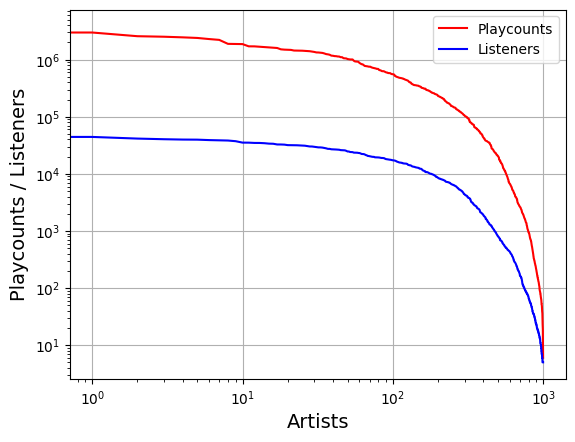

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE = 'LFM-1b_stats_users.txt'

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Listeners'])
    plt.xlabel('Artists', fontsize=14)
    plt.ylabel('Playcounts / Listeners', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine the top played artist
    # max_playcount = np.max(data[:, 1])
    # max_playcount_index = np.argmax(data[0, 1])
    # artist = data[1000, 0]  # Assuming the artist information is stored in the third column (index 2)

    # print(max_playcount_index)

